In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [8]:
df[df['species'] == 'Adelie'].flipper_length_mm

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
147    184.0
148    195.0
149    193.0
150    187.0
151    201.0
Name: flipper_length_mm, Length: 146, dtype: float64

# Gráfico de barras

## count

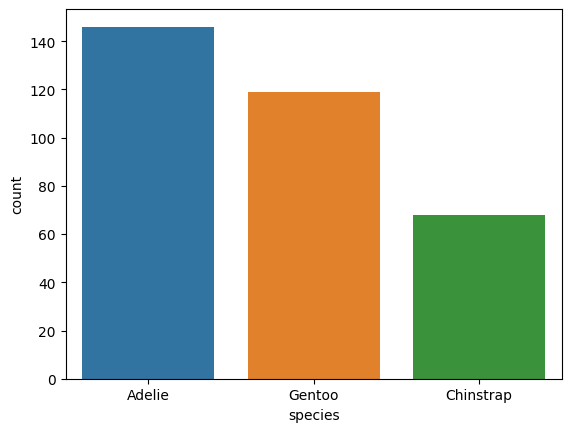

In [9]:
sns.countplot(x='species', data=df);

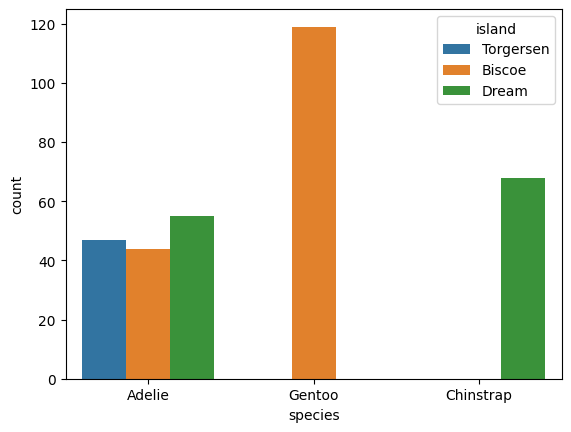

In [10]:
sns.countplot(x='species', hue='island', data=df);

## eixo xy

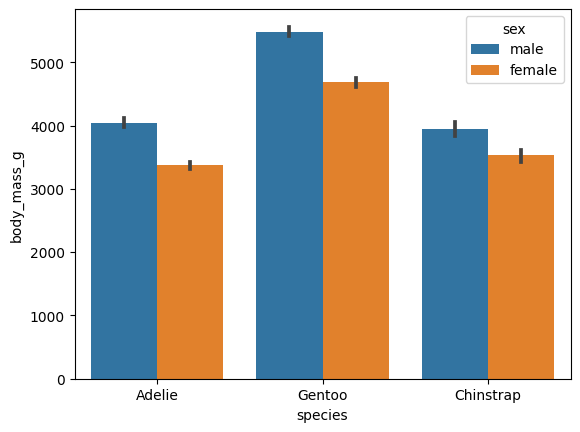

In [11]:
# esse tracinho em cima é o intervalo de confiança da média
sns.barplot(x='species', y='body_mass_g', hue='sex', data=df);

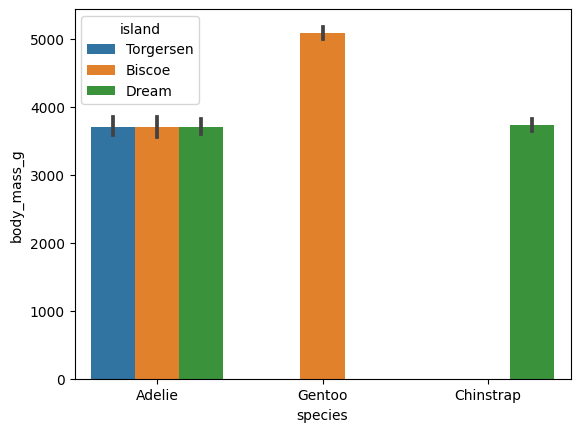

In [12]:
sns.barplot(x='species', y='body_mass_g', hue='island', data=df);

# scatter

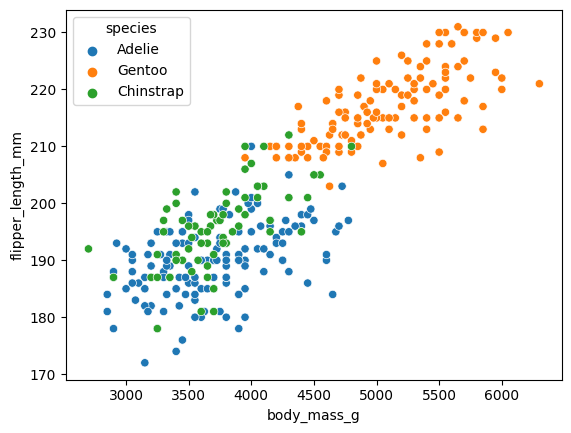

In [13]:
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=df);

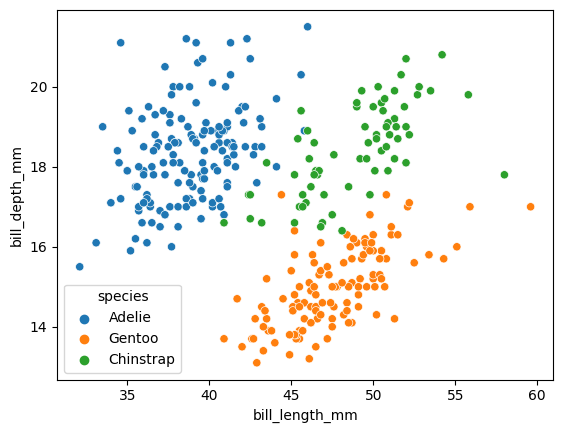

In [14]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df);

# histograma

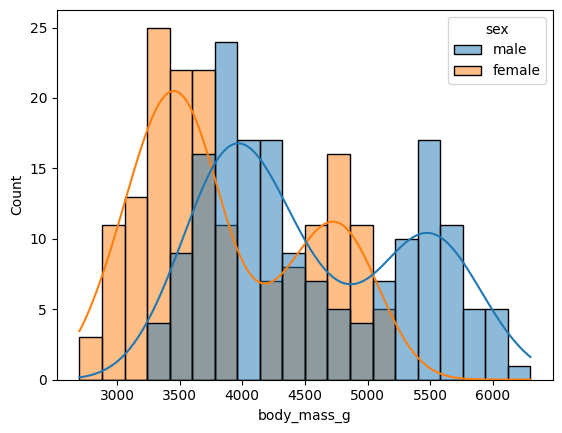

In [15]:
# estimativa de densidade - KDE
# da pra usar esse gráfico para explicar a gaussiana
# uma gaussina é um gráfico em forma de sino, simétrica em torno de sua média e
# possui um único pico
# nesse caso, é possível visuzlizar uma gaussiana com distribuição binomial,
# ou seja, com dois picos distintos
# isso pode indicar que existem duas subpopulações distintas
sns.histplot(x='body_mass_g', bins=20, hue='sex', kde=True, data=df);

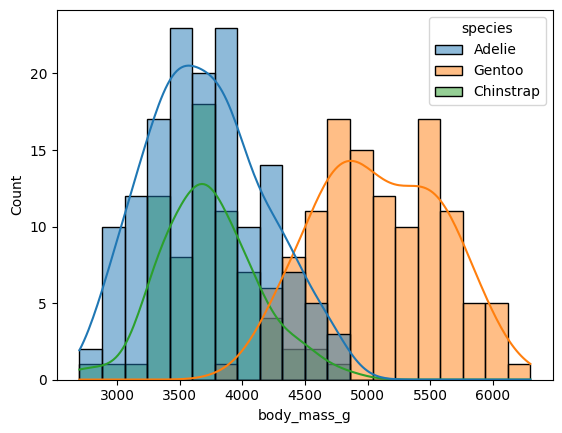

In [16]:
sns.histplot(x='body_mass_g', bins=20, hue='species', kde=True, data=df);

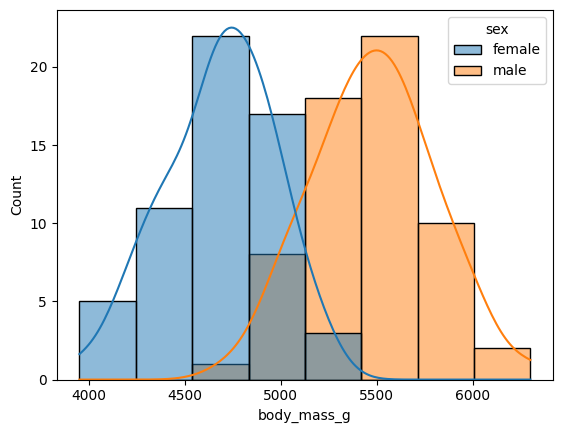

In [17]:
gentoo_df = df[df['species'] == 'Gentoo']
sns.histplot(x='body_mass_g', hue='sex', kde=True, data=gentoo_df);

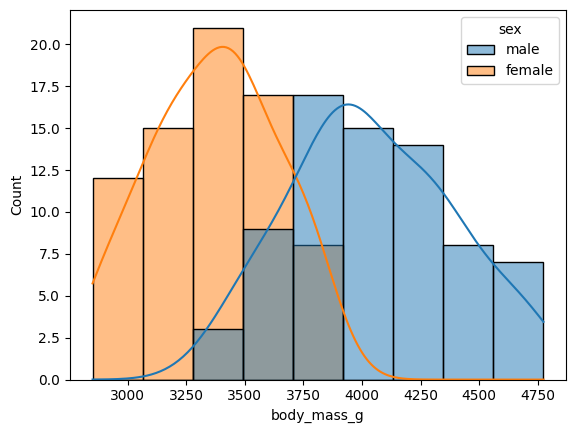

In [18]:
sns.histplot(x='body_mass_g', hue='sex', kde=True, data=df[df['species'] == 'Adelie']);

# boxplot

## Variação do tamanho de asa por espécie

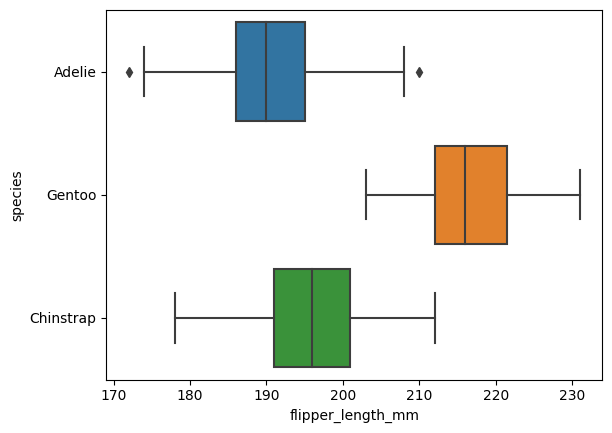

In [19]:
sns.boxplot(data=df, x='flipper_length_mm', y='species');

## Variação do peso por ilha

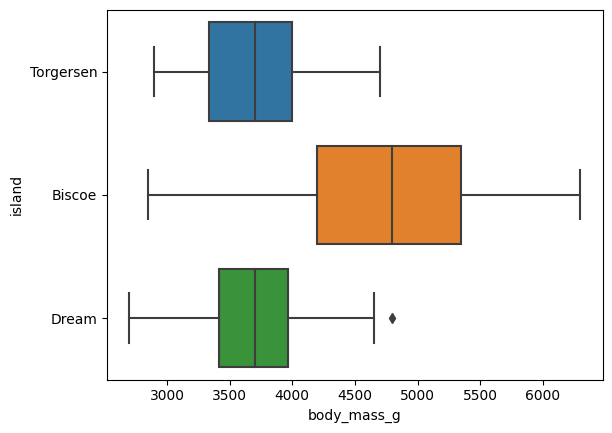

In [20]:
sns.boxplot(x=df.body_mass_g, y=df.island);

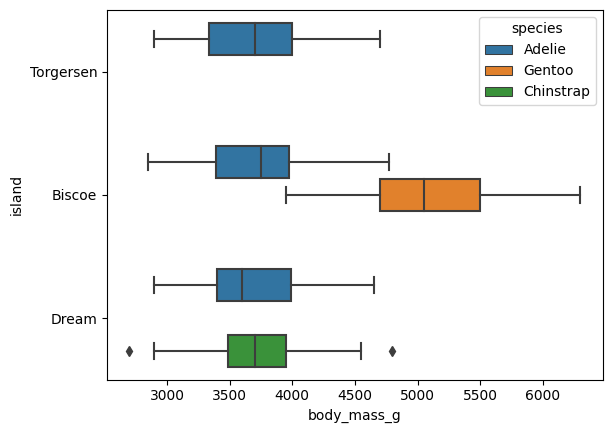

In [21]:
sns.boxplot(data=df, x='body_mass_g', y='island', hue='species');

# correlação

In [22]:
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


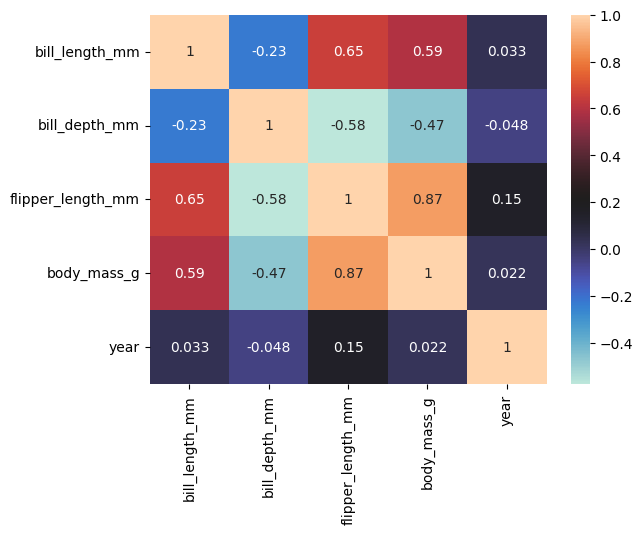

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='icefire');

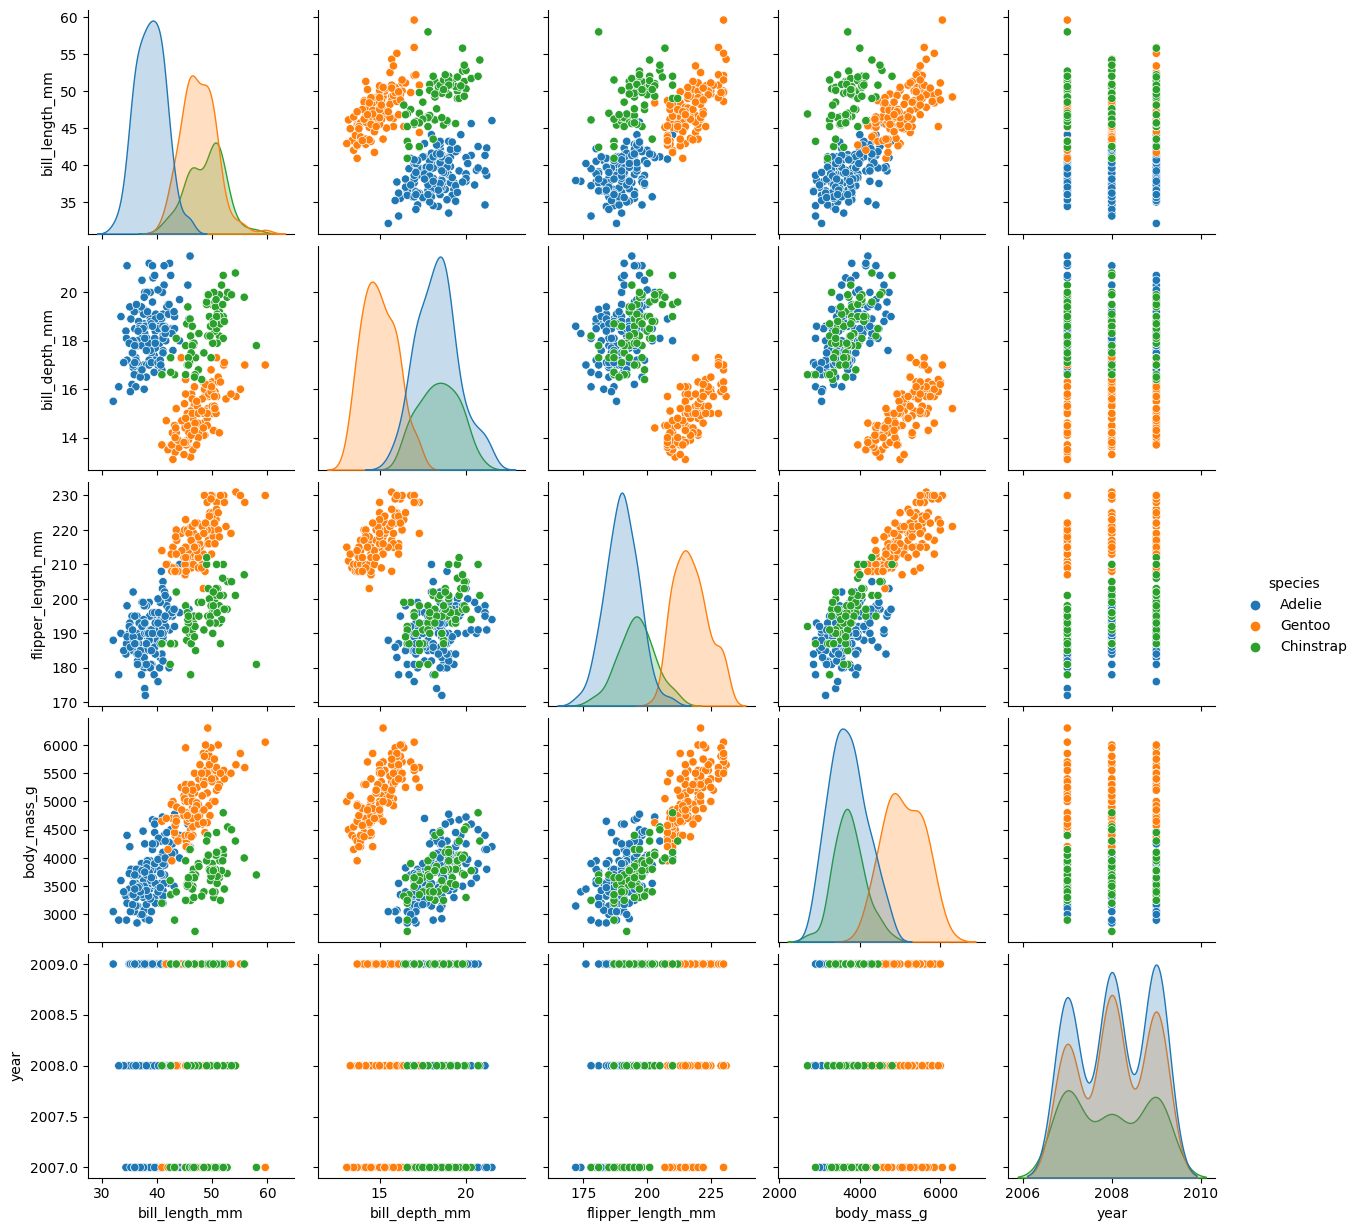

In [24]:
sns.pairplot(df, hue='species');